In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt


# Шаг 1. Подготовка данных

In [2]:
data = pd.read_table('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';')
data.head()

/tmp/ipykernel_17/3855191428.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
len(data)

2075259

Тип object - надо переводить в числовой

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Проверим на пропуски и дубли

In [5]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
data.duplicated().sum()

0

**Уберем тип object**

In [7]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Voltage'], errors='coerce')


In [8]:
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors = 'coerce')

In [9]:
# data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

In [11]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 158.3+ MB


In [13]:
data.drop('Date', axis=1, inplace=True)
data.drop('Time', axis=1, inplace=True)



In [14]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,234.84,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,233.63,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,233.29,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,233.74,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,235.68,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


# Шаг 2 EDA

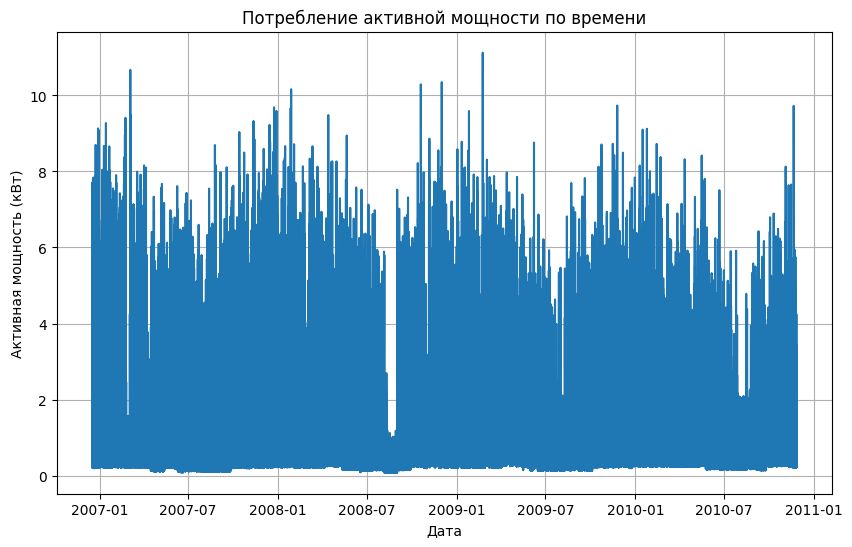

In [15]:
import matplotlib.pyplot as plt

# График временного ряда
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['Global_active_power'])
plt.title('Потребление активной мощности по времени')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)
plt.show()
